In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display(image, image2 = None):
    if image2 is None:
        cv2.imshow("Frame", image)
    else:
        disp_image = cv2.hconcat([image, image2])
        cv2.imshow("Frame", disp_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
orig_image = cv2.imread("Picture1.png", cv2.IMREAD_UNCHANGED)
display(orig_image)

### 1) K-Means Clustering + Canny Edge Detection

In [4]:
k = 3

pixel_values = orig_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(orig_image.shape)
display(segmented_image)

In [5]:
masked_image = np.copy(orig_image)
masked_image = masked_image.reshape((-1, 3))
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]
masked_image = masked_image.reshape(orig_image.shape)
display(masked_image)

In [6]:
def get_Canny1(image, flag = 1):
    kernel = np.ones((3,3),np.float32)/9
    kernel2 = np.ones((3,3), np.uint8)/9
    dst = cv2.filter2D(image,-1,kernel)
    dlt = cv2.dilate(dst, kernel2, iterations=1)
    edges = cv2.Canny(dst,300,310)
    edges2 = cv2.Canny(dlt,300,310)
    if flag:
        display(dlt[:,:,:3], cv2.cvtColor(edges2,cv2.COLOR_GRAY2BGR))
    return edges2
    

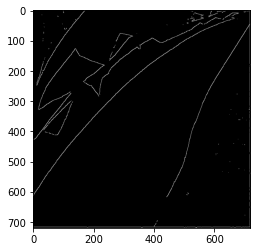

In [7]:
plt.imshow(get_Canny1(orig_image), cmap = "gray")
plt.show()

In [8]:
def get_Canny2(image, flag = 1):
    kernel = np.ones((2,2),np.float32)/4
    kernel2 = np.ones((5,5), np.uint8)/5
    dst = cv2.filter2D(image,-1,kernel)
    dlt = cv2.dilate(dst, kernel2, iterations=1)
    edges = cv2.Canny(dst,300,310)
    edges2 = cv2.Canny(dlt,300,310)
    if flag:
        display(dlt[:,:,:3], cv2.cvtColor(edges2,cv2.COLOR_GRAY2BGR))
    return edges2

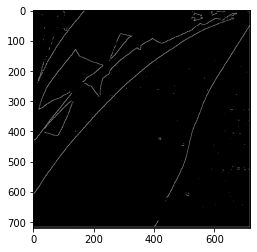

In [9]:
plt.imshow(get_Canny2(orig_image), cmap = "gray")
plt.show()

In [10]:
edges = get_Canny2(orig_image, 0)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
dst = cv2.addWeighted(orig_image[:,:,:3],1.0,edges_rgb,1.5,1.5)
display(dst)

In [41]:
# cv2.imwrite("orig_image_edges.png", get_Canny2(orig_image))
# cv2.imwrite("overlay_edges_canny2.png", dst)

True

## 2) DL Based

In [11]:
!pip install sh

In [16]:
# sh download_pretrained.sh

In [15]:
# net = cv2.dnn.readNet(args.prototxt, args.caffemodel)